In [ ]:
#Install Tensorflow and MNIST dataset if not installed
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
VALID_PERCENT = 0.3

(X_train, y_train), (X_test, y_test) = mnist.load_data()
split_on = int((1 - VALID_PERCENT) * len(X_train))

train_images = X_train[0:split_on,:,:]/255
train_labels = to_categorical(y_train)[0:split_on,:]

valid_images = X_train[split_on:,:,:]/255
valid_labels = to_categorical(y_train)[split_on:,:]

test_images = X_test/255
test_labels = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train[1]

0

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

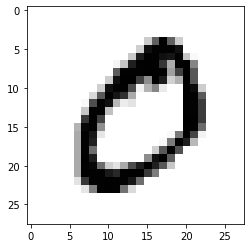

In [ ]:
plt.imshow(train_images[1],cmap='gray_r')

In [ ]:
from tensorflow.python.keras.layers.pooling import MaxPool2D
# build CNN model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D

input = Input(shape=(28,28,1))
cnn1 = Conv2D(32,kernel_size=3, activation='relu', input_shape=(28,28,1))(input)
cnn2 = Conv2D(64,kernel_size=3, activation='relu')(cnn1)
mp2 = MaxPooling2D(2,2)(cnn2)

f = Flatten()(mp2)

d1 = Dense(32,activation='sigmoid')(f)
output = Dense(10,activation='softmax')(d1)

cnnModel=Model(input,output)
cnnModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 32)                294944    
                                                             

In [ ]:
cnnModel.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
cnnModel.fit(train_images, train_labels,epochs=10, validation_split=0.3,batch_size=128,shuffle = True,)


Epoch 1/10
230/230 [==============================] - 13s 16ms/step - loss: 0.7366 - accuracy: 0.8567 - val_loss: 0.3146 - val_accuracy: 0.9532
Epoch 2/10
230/230 [==============================] - 3s 13ms/step - loss: 0.2041 - accuracy: 0.9661 - val_loss: 0.1570 - val_accuracy: 0.9691
Epoch 3/10
230/230 [==============================] - 3s 13ms/step - loss: 0.1137 - accuracy: 0.9791 - val_loss: 0.1091 - val_accuracy: 0.9760
Epoch 4/10
230/230 [==============================] - 3s 14ms/step - loss: 0.0772 - accuracy: 0.9854 - val_loss: 0.0904 - val_accuracy: 0.9781
Epoch 5/10
230/230 [==============================] - 3s 12ms/step - loss: 0.0574 - accuracy: 0.9893 - val_loss: 0.0752 - val_accuracy: 0.9815
Epoch 6/10
230/230 [==============================] - 3s 12ms/step - loss: 0.0430 - accuracy: 0.9924 - val_loss: 0.0679 - val_accuracy: 0.9830
Epoch 7/10
230/230 [==============================] - 2s 10ms/step - loss: 0.0331 - accuracy: 0.9945 - val_loss: 0.0632 - val_accuracy: 0.983

In [ ]:
testLoss, testAccuracy = cnnModel.evaluate(test_images, test_labels)
print(testAccuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0444 - accuracy: 0.9865
0.9865000247955322


6


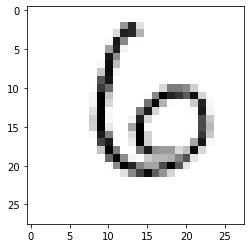

In [ ]:
image_index = 100
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = cnnModel.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
!git clone https://github.com/MuhammadAshiqAmeer/draw_ui.git

Cloning into 'draw_ui'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 3.23 KiB | 1.62 MiB/s, done.


In [ ]:
%run /content/draw_ui/draw.py

draw(filename = "input.png", w=280, h=280, line_width=8)

2008

In [ ]:
from PIL import Image, ImageOps

im = Image.open("/content/input.png")
im_np=np.array(im)
gray=np.mean(im_np,axis=2)

#plt.imread("input.png")
#plt.imshow(im,cmap="gray")

i=np.array(gray)/gray.max()

im_gray = Image.fromarray(gray.astype(np.uint8), mode='L')
im_gray = im_gray.resize((28,28))


(cnnModel.predict(np.array(im_gray).reshape(1, 28, 28, 1))).argmax()


2

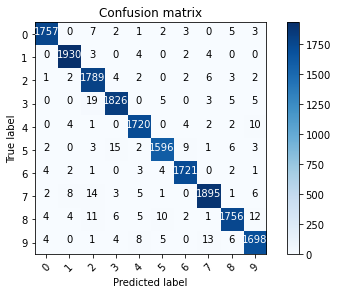

In [ ]:
# Look at confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = cnnModel.predict(valid_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(valid_labels,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))